<a href="https://colab.research.google.com/github/SkourtsidisGiorgos/NTUA-Helpers/blob/main/ML_and_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# To do list
 - Reinforcement learning agent exercise
 - Genetic algorithms
 - Bayes classifier
 - 2d Kohonen map

#Aπλά νευρωνικά δίκτυα

Για να τρέξεις οποιδήποτε νευρωνικό τρέξε πρώτα το αποκάτω κελί και μετά πηγαινε στην αρχιτεκτονική που θες

In [ ]:
# Important stuff for all NN architectures
import math 
import numpy as np
from sympy import *

def sigmoid(x):
  return 1/(1 + np.exp(-x))
def relu(x):
  return np.maximum(0,x)
def sign(x):
  return 1 if x>=0 else -1
def step(x):
  return 1 if x>=0 else 0
def softmax(x):
  """Compute softmax values for each sets of scores in x."""
  e_x = np.exp(x - np.max(x))
  return e_x / e_x.sum()

def sigmoid_derivative(x):
  return sigmoid(x)*(1-sigmoid(x)) 
def relu_derivative(x):
  return 1 if x>=0 else 0
def softmax_grad(s): 
    # Take the derivative of softmax element w.r.t the each logit which is usually Wi * X
    # input s is softmax value of the original input x. 
    # s.shape = (1, n) 
    # i.e. s = np.array([0.3, 0.7]), x = np.array([0, 1])

    # initialize the 2-D jacobian matrix.
    jacobian_m = np.diag(s)

    for i in range(len(jacobian_m)):
        for j in range(len(jacobian_m)):
            if i == j:
                jacobian_m[i][j] = s[i] * (1-s[i])
            else: 
                jacobian_m[i][j] = -s[i]*s[j]
    return jacobian_m

## 1 νευρώνας n εισόδων

In [ ]:
x=[(1,1),(-1,0),(1,0),(0,-1)]
y=[1,1,0,0]
w = [1,1,1] 
bias = 1        # πόλωση
lr = 0.2          # ρυθμός μάθησης
f = step     # Activation Function


# U should only change stuff above this line
#----------------------------------------------------------------------#
n = len(w)-1           # Αριθμός νευρώνων εισόδου
# print("N = ",n)
epochs = len(x)
counter = 1
epan=1
while(counter!=0):
  print("\n\n\nEpanalipsi = ",epan)
  epan+=1
  counter=0
  for e in range(epochs):
    sum = 0
    print(f"\ninput={x[e]}")
    print("-----------------------------------------------------------")
    for i in range(n):
      sum += w[i+1] * x[e][i]
    sum += bias * w[0]
    # print("Σxi+b =",sum)
    ypred = f(sum)
    d = y[e]-ypred
    if ( round(y[e],3)!= round(ypred,3)): 
      counter+=1
    for i in range(n):
      w[i+1] = w[i+1] + d*x[e][i]*lr
    w[0] = w[0] + d*bias*lr
    

    print("ypred =",round(ypred,3))
    print("δ =",round(d,3))
    print(f"W{e+1} = {np.round(w,3)}")




Epanalipsi =  1

input=(1, 1)
-----------------------------------------------------------
ypred = 1
δ = 0
W1 = [1. 1. 1.]

input=(-1, 0)
-----------------------------------------------------------
ypred = 1
δ = 0
W2 = [1. 1. 1.]

input=(1, 0)
-----------------------------------------------------------
ypred = 1
δ = -1
W3 = [0.8 0.8 1. ]

input=(0, -1)
-----------------------------------------------------------
ypred = 0
δ = 0
W4 = [0.8 0.8 1. ]



Epanalipsi =  2

input=(1, 1)
-----------------------------------------------------------
ypred = 1
δ = 0
W1 = [0.8 0.8 1. ]

input=(-1, 0)
-----------------------------------------------------------
ypred = 1
δ = 0
W2 = [0.8 0.8 1. ]

input=(1, 0)
-----------------------------------------------------------
ypred = 1
δ = -1
W3 = [0.6 0.6 1. ]

input=(0, -1)
-----------------------------------------------------------
ypred = 0
δ = 0
W4 = [0.6 0.6 1. ]



Epanalipsi =  3

input=(1, 1)
---------------------------------------------------------

## 2 είσοδοι,2 κρυφοί,1 έξοδος

Το χω φτιάξει για διάταξη 2-2-1 προς το παρον  
(αλλα εχει προοπτικές για 2-n-1)

In [ ]:
n = 2           # Αριθμός νευρώνων κρυφού επιπέδου
x = [[0.35, 0.9]] # Είσοδος
y = [0.5]         # Έξοδος
bias = 0        # πόλωση
lr = 1          # ρυθμός μάθησης
f = sigmoid     # Activation Function
df = sigmoid_derivative # παράγωγος activation function

# Βάρη. Βαλε τα βάρη οπως καταλήγουν στους νευρώνες κρυφού επιπέδου,από πάνω προς τα κάτω.Δηλ w1A, W2A, w1B, w2B...
w = [0.1, 0.8, 0.4, 0.6, 0.3, 0.9] 

# U should only change stuff above this line
#----------------------------------------------------------------------#
for ep in range(len(x)):  
  x=x[ep]
  y=y[ep]
  xi = []
  yi = []
  ypred = 0
  # κρυφό επιπεδο
  for i in range(n):
    temp = x[0]*w[2*i] + x[1]*w[2*i+1]
    xi.append(temp)
    yi.append(f(temp))
    print(f"x{i} = Σwi*xi =",round(temp,4))
    print(f"y{i} = f(x{i}) =",round(f(temp),4))

  # επιπεδο εξόδου
  xfinal = 0
  for i in range(n):
    xfinal += xi[i]*w[2*n+i]
  ypred = f(xfinal)
  print(f"xfinal = {round(xfinal,4)}")
  print(f"ypred = {round(ypred,4)}")

  # backpropagation
  d = (y-ypred) * df(ypred)
  print(f"δ = {round(d,4)}")
  for i in range(n):
    w[2*n+i] = w[2*n+i] + (d*yi[i])* lr
    print(f"w{2*n+i}_new = {round(w[2*n+i],4)}")
  di=[]
  for i in range(n):
    temp = df(yi[i]) * d * w[2*n+i]
    di.append(temp)
    print(f"δ{i} = f{round(temp,4)}")

  for i in range(n):
    w[2*i] = w[2*i] + (di[i] * xi[i]) * lr
    w[2*i+1] = w[2*i+1] + (di[i] * xi[i])* lr
    print(f"w1{i}' = w1{i}+δ1*x1 = {round(w[2*i],4)}")
    print(f"w2{i}' = w2{i}+δ2*x2 = {round(w[2*i+1],4)}")

x0 = Σwi*xi = 0.755
y0 = f(x0) = 0.6803
x1 = Σwi*xi = 0.68
y1 = f(x1) = 0.6637
xfinal = 0.8385
ypred = 0.6981
δ = -0.044
w4_new = 0.2701
w5_new = 0.8708
δ0 = f-0.0026
δ1 = f-0.0086
w10' = w10+δ1*x1 = 0.098
w20' = w20+δ2*x2 = 0.798
w11' = w11+δ1*x1 = 0.3942
w21' = w21+δ2*x2 = 0.5942


## 4 είσοδοι,2 κρυφοι,1 έξοδος

Υλοποιήθηκε το δίκτυ της εικόνας.

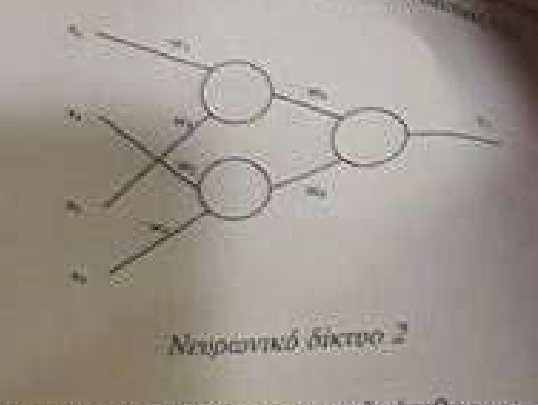

In [ ]:
n = 4           # Αριθμός νευρώνων εισόδου
x = [0.6, 0.2, 0.4, 0.1] # Είσοδος
w = [0.5, 0.2, 0.1, 0.2, 0.6, 0.3] 
y = 0.7         # Έξοδος
bias = 0        # πόλωση
lr = 1          # ρυθμός μάθησης
f = sigmoid     # Activation Function
df = sigmoid_derivative # παράγωγος activation function
epochs = 1

# U should only change stuff above this line
#----------------------------------------------------------------------#

# κρυφό επιπεδο
xa = x[0]*w[0]+x[2]*w[2] + bias
ya = f(xa)
xb = x[1]*w[1]+x[3]*w[3] + bias
yb = f(xb)
xc = xa*w[4] + xb*w[5] + bias
ypred = f(xc)

d = df(ypred) * (y-ypred)

for i in range(n):
  w[i] = w[i] + (d*x[i]*lr)

print(f"xA={round(xa,3)}, xB={round(xb,3)}, xC={round(xc,3)}")
print(f"yA={round(ya,3)}, yB={round(yb,3)}, yC={round(ypred,3)}")
print("ypred",round(ypred,3))
print(f"y-ypred = {round(y-ypred,3)}\n")
print("δ =",round(d,3))
for i in range(4):
  print(f"W[{i}] =",round(w[i],3))

xA=0.34, xB=0.06, xC=0.222
yA=0.584, yB=0.515, yC=0.555
ypred 0.555
y-ypred = 0.145

δ = 0.034
W[0] = 0.52
W[1] = 0.207
W[2] = 0.113
W[3] = 0.203


## 2-2-2

In [ ]:
x = [(1,1), (1,0)]
y = [(1,0), (0,-1)]         # Έξοδος
w = [(1,1,1,1), (1,1,1,1)] 
bias = 0        # πόλωση
lr = 0.2          # ρυθμός μάθησης
f = sigmoid     # Activation Function
df = sigmoid_derivative # παράγωγος activation function

# U should only change stuff above this line
#----------------------------------------------------------------------#
levels = len(w)-1      # Aριθμός κρυφών επιπέδων
inputs = len(x[0])        # Αριθμός νευρώνων εισόδου
outs = len(y[0])       # Αριθμός εξόδων
epochs = len(x)        # Αριθμός δοσμένων προτύπων - επαναλήψεων (δηλ. len(x_train) )

for e in range(epochs):
  # κρυφό επιπεδο
  xa = x[e][0]*w[0][0] + x[e][1]*w[0][2] + bias
  xb = x[e][0]*w[0][1] + x[e][1]*w[0][3] + bias
  ya = f(xa)
  yb = f(xb)
  # έξοδος
  xc = xa*w[1][0] + xb*w[1][2] + bias 
  xd = xa*w[1][1] + xb*w[1][3] + bias 
  yc = f(xc)
  yd = f(xd)

  # backpropagation
  dc = df(yc) * (y[e][0]-yc)
  dd = df(yd) * (y[e][1]-yd)

  w_out = (w[1][0] + dc*ya*lr, 
           w[1][1] + dd*ya*lr, 
           w[1][2] + dc*yb*lr, 
           w[1][3] + dd*yb*lr)
  w[1] = w_out 

  da = df(ya) * (dc*w[1][0] + dd*w[1][1])
  db = df(yb) * (dc*w[1][2] + dd*w[1][3])
  w_in = (w[0][0] + da*x[e][0]*lr, 
          w[1][1] + db*x[e][0]*lr, 
          w[1][2] + da*x[e][1]*lr, 
          w[1][3] + db*x[e][1]*lr)
  w[0] = w_in

  print(f"\n{e+1}η επανάληψη, Eίσοδος:{x[e]}")
  print(f"xA={round(x[e][0],3)}*{round(w[0][0],3)}+{round(x[e][1],3)}*{round(w[0][2],3)}={round(xa,3)}, xB={round(xb,3)}")
  print(f"yA={round(ya,3)}, yB={round(yb,3)}")
  print(f"xC={round(xc,3)}, xB={round(xd,3)}")
  print(f"yc={round(yc,3)}, yB={round(yd,3)}")
  print("δC =",round(dc,3),", δD=",round(dd,3))
  print(f"w_out{tuple([round(x,3) for x in w[1]])}")
  print("δΑ =",round(da,3),", δΒ=",round(db,3))
  print(f"w_in = {tuple([round(x,3) for x in w[0]])}")


1η επανάληψη, Eίσοδος:(1, 1)
xA=1*0.992+1*0.993=2, xB=2
yA=0.881, yB=0.881
xC=4, xB=4
yc=0.982, yB=0.982
δC = 0.004 , δD= -0.195
w_out(1.001, 0.966, 1.001, 0.966)
δΑ = -0.038 , δΒ= -0.038
w_in = (0.992, 0.958, 0.993, 0.958)

2η επανάληψη, Eίσοδος:(1, 0)
xA=1*0.969+0*0.974=0.992, xB=0.958
yA=0.73, yB=0.723
xC=1.952, xB=1.884
yc=0.876, yB=0.868
δC = -0.182 , δD= -0.389
w_out(0.974, 0.909, 0.974, 0.909)
δΑ = -0.116 , δΒ= -0.117
w_in = (0.969, 0.886, 0.974, 0.909)


## 2-3-2

In [ ]:
x = [(1,1), (1,0)]
y = [(1,0), (0,-1)]         # Έξοδος
w = [(1,1,1,1,1,1), (1,1,1,1,1,1)] 
bias = 0        # πόλωση
lr = 1          # ρυθμός μάθησης
f = sigmoid     # Activation Function
df = sigmoid_derivative # παράγωγος activation function

# U should only change stuff above this line
#----------------------------------------------------------------------#
levels = len(w)-1      # Aριθμός κρυφών επιπέδων
inputs = len(x[0])        # Αριθμός νευρώνων εισόδου
outs = len(y[0])       # Αριθμός εξόδων
epochs = len(x)        # Αριθμός δοσμένων προτύπων - επαναλήψεων (δηλ. len(x_train) )

for e in range(epochs):
  # κρυφό επιπεδο
  xa = x[e][0]*w[0][0] + x[e][1]*w[0][3] 
  xb = x[e][0]*w[0][1] + x[e][1]*w[0][4]
  xc = x[e][0]*w[0][2] + x[e][1]*w[0][5]
  ya = f(xa)
  yb = f(xb)
  yc = f(xc)
  # έξοδος
  xd = xa*w[1][0] + xb*w[1][2] + xc*w[1][4]  
  xe = xa*w[1][1] + xb*w[1][3] + xc*w[1][5]  
  yd = f(xd)
  ye = f(xe)

  # backpropagation
  dd = df(yd) * (y[e][0]-yd)
  de = df(ye) * (y[e][1]-ye)

  w_out = (w[1][0] + dd*ya*lr, 
           w[1][1] + de*ya*lr, 
           w[1][2] + dd*yb*lr, 
           w[1][3] + de*yb*lr,
           w[1][4] + dd*yc*lr,
           w[1][5] + de*yc*lr
           )
  w[1] = w_out 

  da = df(ya) * (dd*w[1][0] + de*w[1][1]) 
  db = df(yb) * (dd*w[1][2] + de*w[1][3])
  dc = df(yc) * (dd*w[1][4] + de*w[1][5])
  w_in = (w[0][0] + da*x[e][0]*lr, 
          w[1][1] + db*x[e][0]*lr, 
          w[1][2] + dc*x[e][0]*lr, 
          w[1][3] + da*x[e][1]*lr, 
          w[1][4] + db*x[e][1]*lr,
          w[1][5] + dc*x[e][1]*lr)
  w[0] = w_in

  print(f"\n{e+1}η επανάληψη, Eίσοδος:{x[e]}")
  print(f"xA={round(xa,3)}, xB={round(xb,3)}, xC={round(xc,3)}")
  print(f"yA={round(ya,3)}, yB={round(yb,3)}, yC={round(xb,3)}")
  print(f"xD={round(xd,3)}, xE={round(xe,3)}")
  print(f"yD={round(yd,3)}, yE={round(ye,3)}")
  print("δD =",round(dd,3),", δE=",round(de,3))
  print(f"w_out{tuple([round(x,3) for x in w[1]])}")
  print("δΑ =",round(da,3),", δΒ=",round(db,3),",δC=",round(dc,3))
  print(f"w_in = {tuple([round(x,3) for x in w[0]])}")


1η επανάληψη, Eίσοδος:(1, 1)
xA=2, xB=2, xC=2
yA=0.881, yB=0.881, yC=2
xD=6, xE=6
yD=0.998, yE=0.998
δD = 0.0 , δE= -0.196
w_out(1.0, 0.827, 1.0, 0.827, 1.0, 0.827)
δΑ = -0.034 , δΒ= -0.034 ,δC= -0.034
w_in = (0.966, 0.794, 0.967, 0.794, 0.967, 0.794)

2η επανάληψη, Eίσοδος:(1, 0)
xA=0.966, xB=0.794, xC=0.967
yA=0.724, yB=0.689, yC=0.794
xD=2.728, xE=2.255
yD=0.939, yE=0.905
δD = -0.19 , δE= -0.391
w_out(0.863, 0.544, 0.87, 0.558, 0.863, 0.544)
δΑ = -0.083 , δΒ= -0.085 ,δC= -0.083
w_in = (0.884, 0.459, 0.787, 0.558, 0.863, 0.544)


## Γενική περίπτωση (in progress)

In [ ]:
x = [(1,1), (1,0)]
y = [(1,0), (0,-1)]         # Έξοδος
w = [(1,1,1,1), (1,1,1,1)] 
bias = 0        # πόλωση
lr = 1          # ρυθμός μάθησης
f = sigmoid     # Activation Function
df = sigmoid_derivative # παράγωγος activation function

# U should only change stuff above this line
#----------------------------------------------------------------------#
levels = len(w)-1      # Aριθμός κρυφών επιπέδων
inputs = len(x[0])        # Αριθμός νευρώνων εισόδου
outs = len(y[0])       # Αριθμός εξόδων
epochs = len(x)        # Αριθμός δοσμένων προτύπων - επαναλήψεων (δηλ. len(x_train) )
secret = []            # Aριθμός νευρώννω κάθε κρυφού επιπέδου
secret.append(len(w[0])/inp)
for x in range(levels-1):
  secret.append(w[x]/secret[x-1])

xi = []
yi = []
ypred = 0


# Για κάθε πρότυπο που μας δίνεται (for x in x_train στην ουσία)
for i in range(epochs):

# Kάνουμε feed-forward για το 1ο κρυφό επίπεδο και τις εισόδους 
  xi_temp = []
  for j in range(secret[0]):
    temp = 0
    for inp in inputs:
      temp += x[i][inp] * w[0][inp]
    xi_temp.append(temp)
  xi.append(xi_temp)
  for j in range(len(xi[0])):
    yi.append(f(j))

#   print(f"x{i} = Σwi*xi =",round(temp,4))
#   print(f"y{i} = f(x{i}) =",round(f(temp),4))

# # επιπεδο εξόδου
# xfinal = 0
# for i in range(n):
#   xfinal += xi[i]*w[2*n+i]
# ypred = f(xfinal)
# print(f"xfinal = {round(xfinal,4)}")
# print(f"ypred = {round(ypred,4)}")

# # backpropagation
# d = (y-ypred) * df(ypred)
# print(f"δ = {round(d,4)}")
# for i in range(n):
#   w[2*n+i] = w[2*n+i] + (d*yi[i])* lr
#   print(f"w{2*n+i}_new = {round(w[2*n+i],4)}")
# di=[]
# for i in range(n):
#   temp = df(yi[i]) * d * w[2*n+i]
#   di.append(temp)
#   print(f"δ{i} = f{round(temp,4)}")

# for i in range(n):
#   w[2*i] = w[2*i] + (di[i] * xi[i]) * lr
#   w[2*i+1] = w[2*i+1] + (di[i] * xi[i])* lr
#   print(f"w1{i}' = w1{i}+δ1*x1 = {round(w[2*i],4)}")
#   print(f"w2{i}' = w2{i}+δ2*x2 = {round(w[2*i+1],4)}")

#Kohonen

In [ ]:
geitonia = 0 # 0->μόνο νικητής  1->+τον αριστερά  2->+δεξιά  3-> +δεξιά-αριστερά
w = [ [0.2, 0.6, 0.5, 0.9] , [0.8, 0.4, 0.7, 0.3]]
x = [ [1, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [0, 0, 1, 1]]
dist = "euclidean" # euclidean -> euclidean distance, οτιδηποτε άλλο -> εσωτερικό γινόμενο
lr = 0.6  # Ρυθμός μάθησης

# U should only change stuff above this line
#----------------------------------------------------------------------#
import numpy as np
import scipy.linalg as la

inp = len(w)
out = len(w[0])
print(f"Metric=",dist)

for e in range(len(x)):
  d = []
  print("\nEpanalipsi=",e,"input =",x[e],"\n----------------------------------------------------------------------")
  for i in range(inp):
    if dist=="euclidean":
      apostasi=0
      for j in range(out):
        apostasi += (x[e][j]-w[i][j])**2
      print(f"d{i} = ||x - w{i}||^2 ={round(apostasi,3)}")
      # apostasi+=apostasi**0.5
      d.append(apostasi)
    else:
      gin =0
      for j in range(out):  
        gin +=w[i][j]*x[e][j]
        d.append(gin) 
  if (dist=="euclidean"):
    winner = float('inf') 
    for i,item in enumerate(d):
      if(item<winner):
        winner =item
        pos = i 
  else:
    winner = float('-inf') 
    for i,item in enumerate(d):
      if(item>winner):
        winner =item
        pos = i
  # print(f"W{i} = {np.round(w[pos+a],3)} + {lr}*({np.round(w[pos+a],3)}-{np.round(x[e])}")
  
  def new_weights(a):
    print(f"w{pos+a}={np.round(w[pos+a],3)} + {lr}*({x[e]}-{np.round(w[pos+a],3)})",end='')
    for j in range(out): 
      w[pos+a][j] = w[pos+a][j] + lr*(x[e][j] - w[pos+a][j])
    print(f"={np.round(w[pos+a],3)}")


  print("Winner = ",pos)
  print("Wk(t+1) = Wk(t) + α(t) (x(t) - Wk(t))")
  new_weights(0)
  print("Wwinner =",np.round(w[pos],3))
  # Και τον αριστερά
  if geitonia == 1:
    new_weights(-1)
    print("Wwinner-1 =", np.round(w[pos-1],4))
  elif geitonia == 2:
    new_weights(1)
    print("Wwinner+1 =", np.round(w[pos+1],4))
  elif geitonia==3:
    new_weights(-1)
    new_weights(1)
    print("Wwinner-1 =", np.round(w[pos-1],4),"Wwinner+1 =", np.round(w[pos+1],4))

Metric= euclidean

Epanalipsi= 0 input = [1, 1, 0, 0] 
----------------------------------------------------------------------
d0 = ||x - w0||^2 =1.86
d1 = ||x - w1||^2 =0.98
Winner =  1
Wk(t+1) = Wk(t) + α(t) (x(t) - Wk(t))
w1=[0.8 0.4 0.7 0.3] + 0.6*([1, 1, 0, 0]-[0.8 0.4 0.7 0.3])=[0.92 0.76 0.28 0.12]
Wwinner = [0.92 0.76 0.28 0.12]

Epanalipsi= 1 input = [0, 0, 0, 1] 
----------------------------------------------------------------------
d0 = ||x - w0||^2 =0.66
d1 = ||x - w1||^2 =2.277
Winner =  0
Wk(t+1) = Wk(t) + α(t) (x(t) - Wk(t))
w0=[0.2 0.6 0.5 0.9] + 0.6*([0, 0, 0, 1]-[0.2 0.6 0.5 0.9])=[0.08 0.24 0.2  0.96]
Wwinner = [0.08 0.24 0.2  0.96]

Epanalipsi= 2 input = [1, 0, 0, 0] 
----------------------------------------------------------------------
d0 = ||x - w0||^2 =1.866
d1 = ||x - w1||^2 =0.677
Winner =  1
Wk(t+1) = Wk(t) + α(t) (x(t) - Wk(t))
w1=[0.92 0.76 0.28 0.12] + 0.6*([1, 0, 0, 0]-[0.92 0.76 0.28 0.12])=[0.968 0.304 0.112 0.048]
Wwinner = [0.968 0.304 0.112 0.048]

Ep

#LVQ

In [ ]:
# Συνήθως τα πρώτα διανύσματα εισόδου της άσκησης είναι η αρχικοποίηση των βαρών.Aνάλογα με την 
# κλάση που ανήκει το xi βάζεις τα βάρη στον αντιστοιχο νευρώνα εξόδου.Βάλτα κατάλληλα.
# πχ x1=[0,0,1,1],y1=1 άρα στον 1ο νευρώνα εξόδου θα βάλω αυτά τα βάρη

w = [ [0,0,1,1] , [1,0,0,0]]
x = [ [0,0,0,1], [1, 1, 0, 0], [ 0, 1, 1,0] ]
y = [2,1,1]
dist = "euclidean" # euclidean -> euclidean distance, οτιδηποτε άλλο -> εσωτερικό γινόμενο
lr = 0.1  # Ρυθμός μάθησης

# U should only change stuff above this line
#----------------------------------------------------------------------#
import numpy as np
import scipy.linalg as la

inp = len(w[0])
out = len(w)
print(f"Metric=",dist)

for e in range(len(x)):
  d = []
  print("\nEpanalipsi=",e+1,"input =",x[e],"\n----------------------------------------------------------------------")
  for i in range(out):
    if dist=="euclidean":
      apostasi=0
      for j in range(inp):
        apostasi += (x[e][j]-w[i][j])**2
      print(f"d{i} = ||x - w{i}||^2 ={round(apostasi,3)}")
      # apostasi+=apostasi**0.5
      d.append(apostasi)
    else:
      gin =0
      for j in range(out):  
        gin +=w[i][j]*x[e][j]
        d.append(gin) 
  if (dist=="euclidean"):
    winner = float('inf') 
    for i,item in enumerate(d):
      if(item<winner):
        winner =item
        pos = i 
  else:
    winner = float('-inf') 
    for i,item in enumerate(d):
      if(item>winner):
        winner =item
        pos = i
  # print(f"W{i} = {np.round(w[pos+a],3)} + {lr}*({np.round(w[pos+a],3)}-{np.round(x[e])}")
  
  def new_weights(sign):
    print(f"w{pos}={np.round(w[pos],3)} + ({sign})*{lr}*({x[e]}-{np.round(w[pos],3)})",end='')
    for j in range(inp): 
      w[pos][j] = w[pos][j] + sign*lr*(x[e][j] - w[pos][j])
    print(f"={np.round(w[pos],3)}")

  print("Winner = ",pos,", Class =",y[e]-1)
  if (y[e]-1==pos):
    new_weights(1)
    print("Δwk(t) = η(t) *(x(t) - wk(t)) ")
  else:
    print("Δwk(t) = - η(t) *(x(t) - wk(t)) ")
    new_weights(-1)
  print("Wwinner =",np.round(w[pos],3))

Metric= euclidean

Epanalipsi= 1 input = [0, 0, 0, 1] 
----------------------------------------------------------------------
d0 = ||x - w0||^2 =1
d1 = ||x - w1||^2 =2
Winner =  0 , Class = 1
Δwk(t) = - η(t) *(x(t) - wk(t)) 
w0=[0 0 1 1] + (-1)*0.1*([0, 0, 0, 1]-[0 0 1 1])=[0.  0.  1.1 1. ]
Wwinner = [0.  0.  1.1 1. ]

Epanalipsi= 2 input = [1, 1, 0, 0] 
----------------------------------------------------------------------
d0 = ||x - w0||^2 =4.21
d1 = ||x - w1||^2 =1
Winner =  1 , Class = 0
Δwk(t) = - η(t) *(x(t) - wk(t)) 
w1=[1 0 0 0] + (-1)*0.1*([1, 1, 0, 0]-[1 0 0 0])=[ 1.  -0.1  0.   0. ]
Wwinner = [ 1.  -0.1  0.   0. ]

Epanalipsi= 3 input = [0, 1, 1, 0] 
----------------------------------------------------------------------
d0 = ||x - w0||^2 =2.01
d1 = ||x - w1||^2 =3.21
Winner =  0 , Class = 0
w0=[0.  0.  1.1 1. ] + (1)*0.1*([0, 1, 1, 0]-[0.  0.  1.1 1. ])=[0.   0.1  1.09 0.9 ]
Δwk(t) = η(t) *(x(t) - wk(t)) 
Wwinner = [0.   0.1  1.09 0.9 ]


#Hopfield

Μόνο την ενέργεια έχω φτιάξει

## 3x3

In [ ]:
import numpy as np
w = np.array([[0,1,-1],[1,0,-1],[-1,-1,0]])
w = (1/3)*w

# U should only change stuff above this line
#----------------------------------------------------------------------#
import collections
y = [[-1,-1,-1],[-1,-1,1],[-1,1,-1], 
     [-1,1,1],[1,-1,-1],[1,-1,1],  
     [1,1,-1],[1,1,1]]

n = len(w[0])

# E = -1/2 Σi Σj wij yi yj 
E = []
for k in range(len(y)):
  x = y[k]
  sum = 0
  for i in range(n):
    for j in range(n):  
      # print(x[i],x[j])
      sum += w[i][j]*x[i]*x[j]
  sum*=(-1/2)
  E.append(sum)
print("E = -1/2 Σi Σj wij yi yj  =",np.round(E,3))

# for i in range(len(y)):
#   print(f"{i} {y[i]} ",end='')
#   temp = 0 
#   t_list = y[i]
#   for j in range(len(w[0])):
#     temp += w[i//7][j]*y[i][j]
#     if (temp>=0):
#       t_list[j]=1
#     else:
#       t_list[j]=-1
#   for idx,l in enumerate(y):
#     if collections.Counter(t_list) == collections.Counter(l): 
#       print(f"{idx+1}")
#       break
      

E = -1/2 Σi Σj wij yi yj  = [ 0.333 -1.     0.333  0.333  0.333  0.333 -1.     0.333]


##2x2

In [ ]:
import numpy as np
w = np.array([[0,3],[3,0],[-4,0]])
w = (1/6)*w

# U should only change stuff above this line
#----------------------------------------------------------------------#
import collections
y = [[-1,-1], [-1,1], [1,-1], [1,1]]

n = len(w[0])

# E = -1/2 Σi Σj wij yi yj 
E = []
for k in range(len(y)):
  x = y[k]
  sum = 0
  for i in range(n):
    for j in range(n):  
      # print(x[i],x[j])
      sum += w[i][j]*x[i]*x[j]
  sum*=(-1/2)
  E.append(sum)
print("E = -1/2 Σi Σj wij yi yj  =",np.round(E,3))

E = -1/2 Σi Σj wij yi yj  = [-0.5  0.5  0.5 -0.5]
